In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# config

In [2]:
WORD_LIST = ["god", "jesus", "queen", "king", "woman", "man", "river", "tree", "horse"]

# load vectors

In [3]:
def load_vectors(path_list):
    vector_dict_list = []
    for path in path_list:
        with open(path, "rb") as f:
            vector_dict_list.append(pickle.load(f))
    return vector_dict_list

vf, vg, vw = load_vectors(["/veld/input/fasttext/m1.pkl", "/veld/input/glove/m1.pkl", "/veld/input/word2vec/m1.pkl"])
print("len(vf):", len(vf))
print("len(vg):", len(vg))
print("len(vw):", len(vw))

len(vf): 5278
len(vg): 5278
len(vw): 5277


# check similarities

In [4]:
def get_cosine_similarity_of_vectors(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

In [5]:
def compare_words(vector_dict):
    for i1, w1 in enumerate(WORD_LIST):
        for w2 in WORD_LIST[i1:]:
            print(w1, w2, get_cosine_similarity_of_vectors(vector_dict[w1], vector_dict[w2]))

print("- fasttext ------------------------------")
compare_words(vf)
print("- glove ---------------------------------")
compare_words(vg)
print("- word2vec ------------------------------")
compare_words(vw)

- fasttext ------------------------------
god god 1.0
god jesus 0.2880609
god queen 0.07190522
god king 0.2640545
god woman 0.08656419
god man 0.21669418
god river 0.060309876
god tree 0.091982216
god horse 0.07479139
jesus jesus 1.0
jesus queen 0.12911369
jesus king 0.0786326
jesus woman 0.097701736
jesus man 0.12698327
jesus river 0.06609576
jesus tree 0.13191642
jesus horse 0.020753073
queen queen 1.0000001
queen king 0.337763
queen woman 0.089674674
queen man 0.051893827
queen river 0.11218869
queen tree 0.10733647
queen horse 0.06298174
king king 0.99999994
king woman 0.09539431
king man 0.21122856
king river 0.18861765
king tree 0.042044442
king horse 0.21586822
woman woman 1.0
woman man 0.28899458
woman river 0.048453595
woman tree 0.11814026
woman horse 0.14862576
man man 1.0
man river 0.047050953
man tree 0.1442046
man horse 0.13888589
river river 1.0000001
river tree 0.11154751
river horse 0.11467419
tree tree 0.99999994
tree horse 0.051434282
horse horse 1.0
- glove --------

# PCA plot

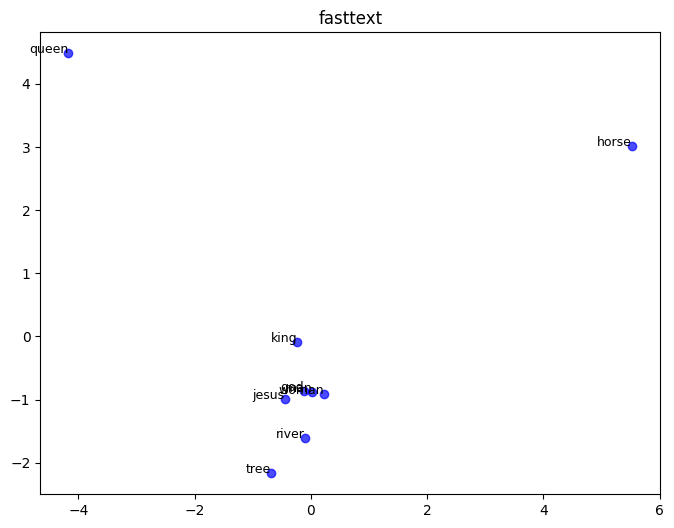

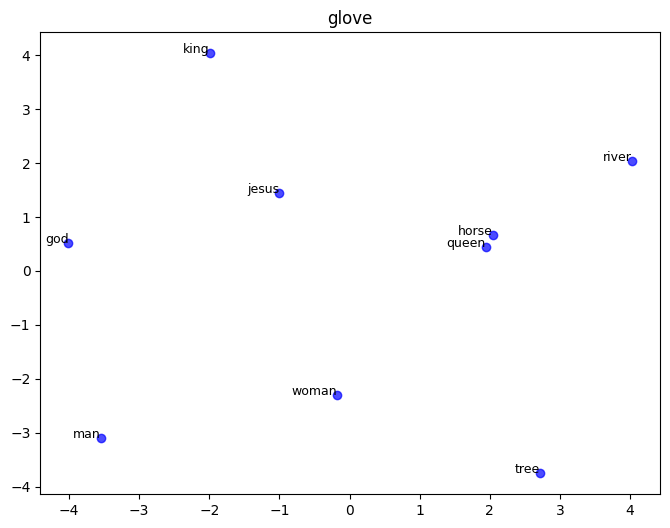

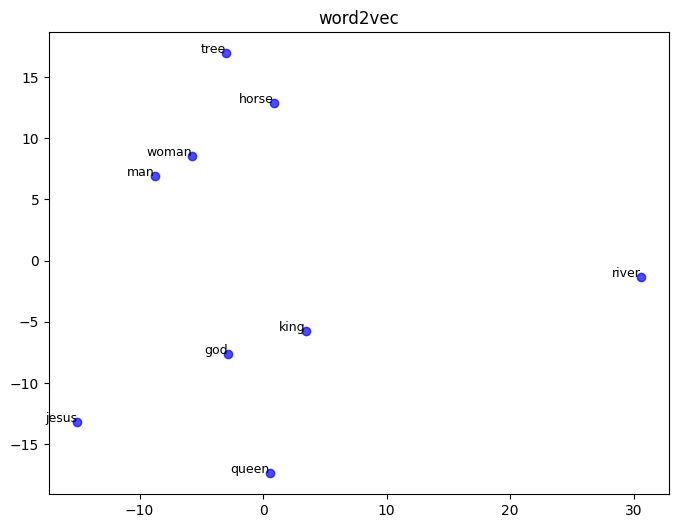

In [6]:
def show_plot_pca(vector_dict, title):

    # get labels and values
    labels = []
    values = []
    for w in WORD_LIST:
        labels.append(w)
        values.append(vector_dict[w])
    values = np.array(values)
    
    # reduce
    pca = PCA(n_components=2)
    reduced_vectors_pca = pca.fit_transform(values)
    
    # Plot the reduced vectors
    plt.figure(figsize=(8, 6))
    plt.scatter(reduced_vectors_pca[:, 0], reduced_vectors_pca[:, 1], c='blue', alpha=0.7)

    # Add labels
    for i, label in enumerate(labels):
        plt.text(
            reduced_vectors_pca[i, 0], 
            reduced_vectors_pca[i, 1], 
            label,
            fontsize=9, 
            ha="right", 
            color="black"
        )
        
    # plot
    plt.title(title)
    plt.show()

show_plot_pca(vf, "fasttext")
show_plot_pca(vg, "glove")
show_plot_pca(vw, "word2vec")